In [2]:
import os
os.getcwd()

'/home/ubuntu/code/pyML/notes'

Using TensorFlow backend.


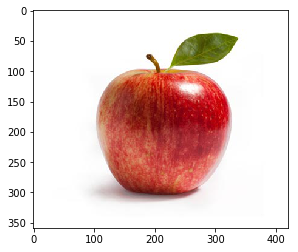

In [3]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt

img = load_img('../image/train/apple/0000.jpg')
plt.imshow(img)
plt.show()

In [4]:
import os
labels = sorted(os.listdir('../image/train'))[1:]
labels

['apple', 'grape', 'lemon', 'melon', 'orange', 'strawberry', 'tomato']

In [5]:
img = []
y = []
for d in range(len(labels)):
    for f in os.listdir('../image/train/' + labels[d]):
        if f[-1] == 'g':
            img.append(img_to_array(load_img('../image/train/' + labels[d] + '/' + f, target_size=(128, 128)))/255)
            y.append(d)
            
import numpy as np
X = np.array(img)

In [6]:
X.shape

(721, 128, 128, 3)

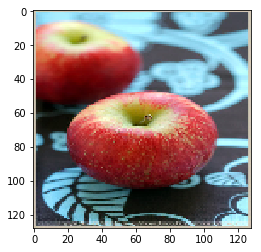

In [7]:
plt.imshow(array_to_img(X[30,:,:,:]))
plt.show()

## ロジスティック回帰

In [11]:
from sklearn.model_selection import train_test_split

X_tr = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, random_state=42, test_size=0.1)

In [8]:
X_tr.shape

(721, 49152)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(verbose=True)
clf.fit(X_train, y_train)

In [22]:
clf.score(X_test, y_test)

0.79452054794520544

## ensemble Gradient Boosting Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(verbose=True, n_estimators=10)
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        1030.2856            2.82m
         2         875.4683            2.52m
         3         758.9874            2.21m


KeyboardInterrupt: 

In [26]:
gbc.score(X_test, y_test)

0.72602739726027399

## CNN

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 32)        0         
__________

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_test

[2,
 6,
 0,
 0,
 0,
 1,
 3,
 2,
 4,
 3,
 3,
 1,
 3,
 0,
 3,
 0,
 6,
 1,
 3,
 6,
 1,
 5,
 1,
 1,
 1,
 0,
 0,
 1,
 5,
 0,
 0,
 6,
 6,
 4,
 5,
 2,
 4,
 4,
 6,
 0,
 2,
 6,
 5,
 5,
 0,
 1,
 4,
 3,
 1,
 3,
 3,
 3,
 5,
 3,
 0,
 2,
 0,
 6,
 3,
 5,
 1,
 2,
 5,
 2,
 3,
 0,
 6,
 6,
 1,
 6,
 3,
 2,
 6]

In [21]:
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
648/648 [==============================] - 2s - loss: 0.4907 - acc: 0.8441     
Epoch 2/30
648/648 [==============================] - 1s - loss: 0.4492 - acc: 0.8441     
Epoch 3/30
648/648 [==============================] - 1s - loss: 0.4307 - acc: 0.8410     
Epoch 4/30
648/648 [==============================] - 1s - loss: 0.3690 - acc: 0.8781     
Epoch 5/30
648/648 [==============================] - 1s - loss: 0.2923 - acc: 0.9059     
Epoch 6/30
648/648 [==============================] - 1s - loss: 0.2417 - acc: 0.9120     
Epoch 7/30
648/648 [==============================] - 1s - loss: 0.2065 - acc: 0.9259     
Epoch 8/30
648/648 [==============================] - 1s - loss: 0.1554 - acc: 0.9491     
Epoch 9/30
648/648 [==============================] - 1s - loss: 0.1600 - acc: 0.9491     
Epoch 10/30
648/648 [==============================] - 1s - loss: 0.1581 - acc: 0.9444     
Epoch 11/30
648/648 [==============================] - 1s - loss: 0.1336 - acc: 0.9660   

In [23]:
model.evaluate(X_test, y_test)

73/73 [==============================] - 0s     


[0.68767351320345105, 0.87671233121662928]